In [1]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
x = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

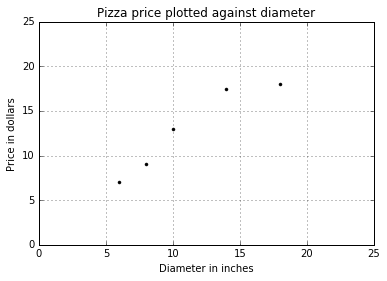

In [13]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(x,y,'k.')
plt.axis([0,25,0,25])
plt.grid()
plt.show()

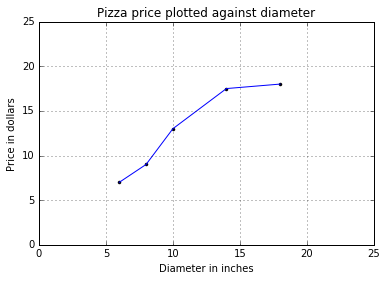

In [23]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(x,y,'k.')
plt.plot(x,y)
plt.axis([0,25,0,25])
plt.grid()
plt.show()

# The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data.

### 1. In scikit-learn, all estimators implement the fit() and predict() methods
### 2. y = mx+c
y is the predicted value of the response variable; in this example, it is the predicted
price of the pizza. x is the explanatory variable. The intercept term(m) and coefficient(c)
 are parameters of the model that are learned by the learning algorithm

Using training data to learn the values of the parameters for simple linear regression
that produce the best fitting model is called ordinary least squares or linear least
squares.

In [16]:
from sklearn.linear_model import LinearRegression
# Training data
x = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
# Create and fit the model
model=LinearRegression() # model created
model.fit(x,y) # model fit
print 'A 12" pizza should cost : $%.2f' % model.predict([12])

A 12" pizza should cost : $13.68


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# Evaluating the fitness of a model with a cost function
The differences between the prices predicted by the model and
the observed prices of the pizzas in the training set are called residuals or training
errors. Later, we will evaluate a model on a separate set of test data; the differences
between the predicted and observed values in the test data are called prediction
errors or test errors.

We can produce the best pizza-price predictor by minimizing the sum of the residuals.
That is, our model fits if the values it predicts for the response variable are close to the
observed values for all of the training examples. This measure of the model's fitness is
called the residual sum of squares cost function


In [24]:
import numpy as np
print 'Residual sum of squares: %.2f' % np.mean((model.predict(x)-y)**2)

Residual sum of squares: 1.75


# Solving ordinary least squares for simple linear regression
   ### y=mx+c
Also, recall that our goal is to solve the values of m and c that minimize the cost
function. We will solve  first. To do so, we will calculate the variance of x and
covariance of x and y.

Variance is a measure of how far a set of values is spread out. If all of the numbers
in the set are equal, the variance of the set is zero. A small variance indicates that the
numbers are near the mean of the set, while a set containing numbers that are far
from the mean and each other will have a large variance.   

                    Var=sum((x-x')^2)/n-1

Covariance is a measure of how much two variables change together. If the value of
the variables increase together, their covariance is positive. If one variable tends to
increase while the other decreases, their covariance is negative. If there is no linear
relationship between the two variables, their covariance will be equal to zero; the
variables are linearly uncorrelated but not necessarily independent.

                    Covariance=sum((x-x')*(y-y'))/n-1

In [25]:
#Calculating the variance
from __future__ import division
xbar=(6+8+10+14+18)/5
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 -xbar)**2 + (18 - xbar)**2) / 4 # divide by n-1
print variance

23.2


In [27]:
# another method
np.var([6, 8, 10, 14, 18],ddof=1) #ddof keyword parameter can be used to set Bessel's correction to calculate the sample variance

23.199999999999999

In [28]:
np.var([6, 8, 10, 14, 18])

18.559999999999999

In [29]:
#Calculating the covariance
xbar = (6 + 8 + 10 + 14 + 18) / 5
ybar = (7 + 9 + 13 + 17.5 + 18) / 5
cov = ((6 - xbar) * (7 - ybar) + (8 - xbar) * (9 - ybar) + (10 -xbar) * (13 - ybar) +(14 - xbar) * (17.5 - ybar)
       + (18 - xbar) * (18 - ybar)) /4  
print cov

22.65


In [30]:
print np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1]

22.65


In [31]:
print np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])

[[ 23.2   22.65]
 [ 22.65  24.3 ]]


Now that we have calculated the variance of our explanatory variable and the
covariance of the response and explanatory variables, we can solve m using the
following formula: .

            m=cov(x,y)/var(x).             
            
Now if we know m, we can solve c by: 

            c= y'-mx'
        here y' is the mean of y and x' is the mean of x and they are the coordinates of the centroid, a point that the model must pass through

In [32]:
m=cov/variance
m

0.9762931034482758

In [33]:
c=ybar-m*xbar
c

1.9655172413793114

Now that we have solved the values of the model's parameters that minimize the
cost function

# Evaluating the model
We have used a learning algorithm to estimate a model's parameters from the training
data. How can we assess whether our model is a good representation of the real
relationship?

Several measures can be used to assess our model's predictive capabilities. We will
evaluate our pizza-price predictor using r-squared. R-squared measures how well
the observed values of the response variables are predicted by the model. More
concretely, r-squared is the proportion of the variance in the response variable that
is explained by the model. An r-squared score of one(1) indicates that the response
variable can be predicted without any error using the model. An r-squared score of
one half(0.5) indicates that half of the variance in the response variable can be predicted
using the model. There are several methods to calculate r-squared. In the case of
simple linear regression, r-squared is equal to the square of the Pearson product
moment correlation coefficient, or Pearson's r.

if r-squared describes the proportion of variance in the
response variable explained by the model, it cannot be greater than one or less than
zero.

First, we must measure the total sum of the squares. i y is the observed value of the
response variable for the ith test instance, and y' is the mean of the observed values
of the response variable:. 

                    SS(tot)=sum((y-y')^2)
                    
Next, we must find the residual sum of the squares. Recall that this is also our
cost function:.

                    SS(res)=sum((y-f(x))^2)
                    f(x): predicted value
                    
Finally, we can find r-squared using the following formula:
                    
                    R^2= 1-SS(res)/SS(tot) 

In [34]:
x = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
x_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
model=LinearRegression()
model.fit(x,y)
print 'R-squared: %.4f' % model.score(x_test, y_test)

R-squared: 0.6620


An r-squared score of 0.6620 indicates that a large proportion of the variance in the
test instances' prices is explained by the model

# Multiple linear regression
                Y = c+m1x1+m2x2+... +mnxn
                
 Let's update our pizza-price predictor program to use the second explanatory
variable, and compare its performance on the test set to that of the simple linear
regression model

In [2]:
from sklearn.linear_model import LinearRegression
x = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model=LinearRegression()
model.fit(x,y)
x_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions=model.predict(x_test)
for i,prediction in enumerate(predictions):
    print 'Predicted: %s, Target: %s' % (prediction,y_test[i])
print 'R-Squared: %.2f' % model.score(x_test,y_test)

Predicted: [ 10.06250019], Target: [11]
Predicted: [ 10.28125019], Target: [8.5]
Predicted: [ 13.09375019], Target: [15]
Predicted: [ 18.14583353], Target: [18]
Predicted: [ 13.31250019], Target: [11]
R-Squared: 0.77


It appears that adding the number of toppings as an explanatory variable has
improved the performance of our model

# Polynomial regression
                            y=c+m1*x+m2*x^2
                            
 The Polynomial Features transformer can be used to easily add
polynomial features to a feature representation

In [12]:
xx.reshape(xx.shape[0],1)[:10]

array([[ 0.        ],
       [ 0.26262626],
       [ 0.52525253],
       [ 0.78787879],
       [ 1.05050505],
       [ 1.31313131],
       [ 1.57575758],
       [ 1.83838384],
       [ 2.1010101 ],
       [ 2.36363636]])

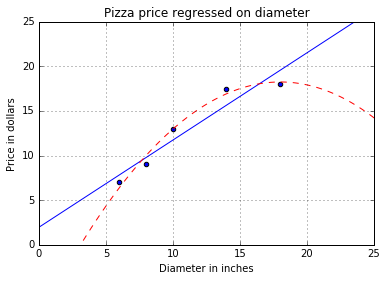

[[6], [8], [10], [14], [18]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
[[6], [8], [11], [16]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
Simple Linear Regression R-Squared: 0.8097268325
Quadrtic Regression R-Squared: 0.8675443656


In [7]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
x_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
x_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
regressor = LinearRegression()
regressor.fit(x_train,y_train)
xx = np.linspace(0,26,100)
yy = regressor.predict(xx.reshape(xx.shape[0],1))
plt.plot(xx,yy)

quadrtic_featurizer = PolynomialFeatures(degree=2)
x_train_quadrtic = quadrtic_featurizer.fit_transform(x_train)
x_test_quadrtic = quadrtic_featurizer.transform(x_test)

regressor_quadrtic = LinearRegression()
regressor_quadrtic.fit(x_train_quadrtic,y_train)
xx_quadrtic = quadrtic_featurizer.transform(xx.reshape(xx.shape[0],1))

plt.plot(xx,regressor_quadrtic.predict(xx_quadrtic),c='r',linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(x_train,y_train)
plt.show()

print x_train
print x_train_quadrtic
print x_test
print x_test_quadrtic
print 'Simple Linear Regression R-Squared: %.10f' % regressor.score(x_test,y_test)
print 'Quadrtic Regression R-Squared: %.10f' % regressor_quadrtic.score(x_test_quadrtic,y_test)


The simple linear regression model is plotted with the solid line in the following
figure. Plotted with a dashed line, the quadratic regression model visibly fits the
training data better

The r-squared score of the simple linear regression model is 0.81; the quadratic
regression model's r-squared score is an improvement at 0.87. While quadratic
and cubic regression models are the most common, we can add polynomials of
any degree.

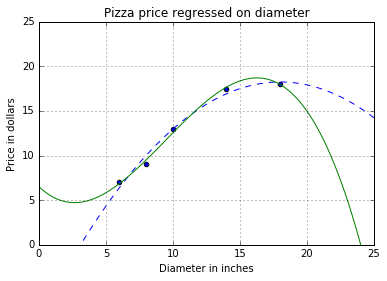

Quadrtic Regression R-Squared: 0.8675443656
Cubic Regression R-Squared: 0.8356924156


In [14]:
#The following figure plots the quadratic and cubic models
x_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
x_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
xx = np.linspace(0,26,100)

quadrtic_featurizer = PolynomialFeatures(degree=2)
x_train_quadrtic = quadrtic_featurizer.fit_transform(x_train)
x_test_quadrtic = quadrtic_featurizer.transform(x_test)

regressor_quadrtic = LinearRegression()
regressor_quadrtic.fit(x_train_quadrtic,y_train)
xx_quadrtic = quadrtic_featurizer.transform(xx.reshape(xx.shape[0],1))
plt.plot(xx,regressor_quadrtic.predict(xx_quadrtic),c='b',linestyle='--')

cubic_featurizer = PolynomialFeatures(degree=3)
x_train_cubic = cubic_featurizer.fit_transform(x_train)
x_test_cubic = cubic_featurizer.transform(x_test)

regressor_cubic = LinearRegression()
regressor_cubic.fit(x_train_cubic,y_train)
xx_cubic = cubic_featurizer.transform(xx.reshape(xx.shape[0],1))
plt.plot(xx,regressor_cubic.predict(xx_cubic),c='g')

plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(x_train,y_train)
plt.show()

print 'Quadrtic Regression R-Squared: %.10f' % regressor_quadrtic.score(x_test_quadrtic,y_test)
print 'Cubic Regression R-Squared: %.10f' % regressor_cubic.score(x_test_cubic,y_test)

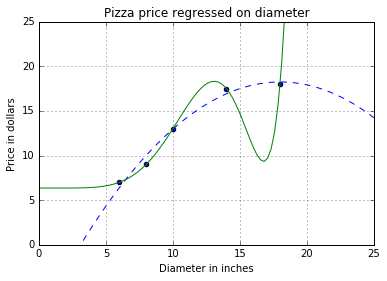

Quadrtic Regression R-Squared: 0.8675443656
Ninth-Degree Regression R-Squared: -0.0943566670


In [15]:
#The following figure plots the quadratic and ninth-degree models
#here cubic means 9th degree
x_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
x_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
xx = np.linspace(0,26,100)

quadrtic_featurizer = PolynomialFeatures(degree=2)
x_train_quadrtic = quadrtic_featurizer.fit_transform(x_train)
x_test_quadrtic = quadrtic_featurizer.transform(x_test)

regressor_quadrtic = LinearRegression()
regressor_quadrtic.fit(x_train_quadrtic,y_train)
xx_quadrtic = quadrtic_featurizer.transform(xx.reshape(xx.shape[0],1))
plt.plot(xx,regressor_quadrtic.predict(xx_quadrtic),c='b',linestyle='--')

cubic_featurizer = PolynomialFeatures(degree=9)
x_train_cubic = cubic_featurizer.fit_transform(x_train)
x_test_cubic = cubic_featurizer.transform(x_test)

regressor_cubic = LinearRegression()
regressor_cubic.fit(x_train_cubic,y_train)
xx_cubic = cubic_featurizer.transform(xx.reshape(xx.shape[0],1))
plt.plot(xx,regressor_cubic.predict(xx_cubic),c='g')

plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(x_train,y_train)
plt.show()

print 'Quadrtic Regression R-Squared: %.10f' % regressor_quadrtic.score(x_test_quadrtic,y_test)
print 'Ninth-Degree Regression R-Squared: %.10f' % regressor_cubic.score(x_test_cubic,y_test)

The ninth-degree polynomial regression model fits the training data almost exactly!
The model's r-squared score, however, is -0.09. We created an extremely complex
model that fits the training data exactly, but fails to approximate the real relationship.
This problem is called over-fitting. The model should induce a general rule to map
inputs to outputs; instead, it has memorized the inputs and outputs from the training
data. As a result, the model performs poorly on test data. It predicts that a 16 inch
pizza should cost less than $10, and an 18 inch pizza should cost more than $30. This
model exactly fits the training data, but fails to learn the real relationship between size
and price.

# Regularization
Regularization is a collection of techniques that can be used to prevent over-fitting.
Regularization adds information to a problem, often in the form of a penalty against
complexity, to a problem.

Occam's razor states that a hypothesis with the fewest
assumptions is the best. Accordingly, regularization attempts to find the simplest
model that explains the data.

In [20]:
#Now Applying LinearRegression to real Data
import pandas as pd
#df = pd.read_csv('C://Users//aagam//Desktop//DataSets//Mastering Machine Learning with scikit learn//8365OS_Final code//8365OS_02_Codes//winequality-red.csv',sep=';')
df = pd.read_csv('./winequality-red.csv',sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


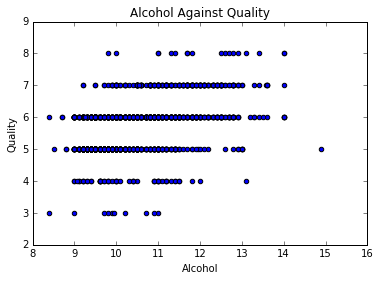

In [21]:
import matplotlib.pylab as plt
>>> plt.scatter(df['alcohol'], df['quality'])
>>> plt.xlabel('Alcohol')
>>> plt.ylabel('Quality')
>>> plt.title('Alcohol Against Quality')
>>> plt.show()

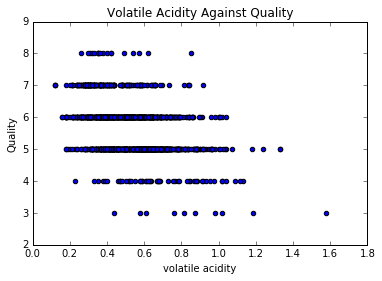

In [22]:
>>> plt.scatter(df['volatile acidity'], df['quality'])
>>> plt.xlabel('volatile acidity')
>>> plt.ylabel('Quality')
>>> plt.title('Volatile Acidity Against Quality')
>>> plt.show()

These plots suggest that the response variable depends on multiple explanatory
variables; let's model the relationship with multiple linear regression. How can we
decide which explanatory variables to include in the model? Dataframe.corr()
calculates a pairwise correlation matrix. The correlation matrix confirms that the
strongest positive correlation is between the alcohol and quality, and that quality
is negatively correlated with volatile acidity, an attribute that can cause wine to
taste like vinegar. To summarize, we have hypothesized that good wines have high
alcohol content and do not taste like vinegar. This hypothesis seems sensible, though
it suggests that wine aficionados may have less sophisticated palates than they claim.

In [26]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Fitting and evaluating the model
Now we will split the data into training and testing sets, train the regressor,
and evaluate its predictions

In [27]:
from sklearn.cross_validation import train_test_split
x = df[list(df.columns)[:-1]]
y = df['quality'] # Target Data
x_train, x_test, y_train, y_test = train_test_split(x, y)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_predictions = regressor.predict(x_test)
print 'R-squared:', regressor.score(x_test, y_test)

R-squared: 0.338003835966


### In this we take all columns except 1 as a explanatory variable for Multiple Linear Regression.

In [29]:
x[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [32]:
x_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,8.318932,0.530396,0.272193,2.541034,0.08731,15.861551,46.799416,0.996718,3.310042,0.655546,10.424812
std,1.744531,0.183484,0.196491,1.403824,0.04527,10.334676,33.441662,0.001890,0.153837,0.165506,1.068874
min,4.600000,0.120000,0.000000,0.900000,0.01200,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.07000,7.000000,22.000000,0.995590,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.07900,14.000000,38.000000,0.996740,3.310000,0.620000,10.100000
75%,9.200000,0.640000,0.430000,2.600000,0.09100,22.000000,62.500000,0.997800,3.400000,0.730000,11.100000
max,15.600000,1.580000,1.000000,15.500000,0.61000,72.000000,289.000000,1.003690,4.010000,2.000000,14.000000


In [33]:
x_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,8.321750,0.520100,0.267325,2.532125,0.087935,15.915000,45.473750,0.996832,3.314325,0.665950,10.417500
std,1.732934,0.165067,0.189841,1.429820,0.052136,10.840737,31.219791,0.001880,0.156171,0.180963,1.057308
min,4.700000,0.120000,0.000000,0.900000,0.034000,1.000000,7.000000,0.990070,2.890000,0.370000,8.400000
25%,7.200000,0.400000,0.100000,1.900000,0.070750,7.000000,22.000000,0.995675,3.210000,0.560000,9.500000
50%,7.900000,0.515000,0.260000,2.200000,0.079000,14.000000,37.000000,0.996790,3.320000,0.620000,10.200000
75%,9.200000,0.620000,0.412500,2.600000,0.089000,21.000000,60.500000,0.998000,3.402500,0.730000,11.000000
max,15.900000,1.020000,0.760000,15.400000,0.611000,68.000000,151.000000,1.003690,3.900000,1.950000,14.900000


By default, 25 percent of the
data is assigned to the test set. Finally, we trained the model and evaluated it on the
test set.

The r-squared score of 0.35 indicates that 35 percent of the variance in the test set
is explained by the model. The performance might change if a different 75 percent
of the data is partitioned to the training set. We can use cross-validation to produce
a better estimate of the estimator's performance.

In [34]:
from sklearn.cross_validation import cross_val_score
regressor = LinearRegression()
scores = cross_val_score(regressor,x,y, cv=5)
print scores.mean(), scores

0.290041628842 [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


The cross_val_score helper function allows us to easily perform cross-validation
using the provided data and estimator. We specified a five-fold cross validation
using the cv keyword argument, that is, each instance will be randomly assigned
to one of the five partitions. Each partition will be used to train and test the model.
cross_val_score returns the value of the estimator's score method for each
round. The r-squared scores range from 0.13 to 0.36! The mean of the scores, 0.29, is a
better estimate of the estimator's predictive power than the r-squared score produced
from a single train / test split.

# Fitting models with gradient descent
Let's use stochastic gradient descent to estimate the parameters of a model with
scikit-learn. SGDRegressor is an implementation of SGD that can be used even for
regression problems with hundreds of thousands or more features. It can be used
to optimize different cost functions to fit different linear models; by default, it will
optimize the residual sum of squares. In this example, we will predict the prices of
houses in the Boston Housing data set from 13 explanatory variables

In [35]:
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
data = load_boston()
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target)

x_scaler = StandardScaler() #we scaled the features using StandardScaler
y_scaler = StandardScaler()
x_train = x_scaler.fit_transform(x_train)
y_train = y_scaler.fit_transform(y_train)
x_test = x_scaler.transform(x_test)
y_test = y_scaler.transform(y_test)

regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, x_train, y_train, cv=5)
print 'Cross validation r-squared scores:', scores
print 'Average cross validation r-squared score:', np.mean(scores)
regressor.fit_transform(x_train, y_train)
print 'Test set r-squared score', regressor.score(x_test, y_test)

Cross validation r-squared scores: [ 0.61108486  0.77492527  0.64062927  0.64084721  0.72011378]
Average cross validation r-squared score: 0.67752007555
Test set r-squared score 0.722391567157


C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

## Stepwise Regression

The step-by-step iterative construction of a regression model that involves automatic selection of independent variables. Stepwise regression can be achieved either by trying out one independent variable at a time and including it in the regression model if it is statistically significant, or by including all potential independent variables in the model and eliminating those that are not statistically significant, or by a combination of both methods.

#### BREAKING DOWN Stepwise Regression
Stepwise regression has a number of drawbacks, according to some statisticians. These include incorrect results, an inherent bias in the process itself and the necessity for significant computing power to develop complex regression models through iteration.
